# Titanic Classification - Azeem

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### Data Collection

In [130]:
td=pd.read_csv("tested.csv")
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Data Preprocessing

In [131]:
td.shape

(418, 12)

In [132]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [133]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Handling the Missing Values

In [134]:
td= td.drop(columns='Cabin',axis=1)
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [135]:
td['Age'].fillna(td['Age'].mean(),inplace=True)

In [136]:
print(td['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [137]:
print(td['Embarked'].mode()[0])

S


In [138]:
td['Embarked'].fillna(td['Embarked'].mode()[0],inplace=True)


In [139]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [140]:
td['Fare'].fillna(td['Fare'].mean(),inplace=True)


In [141]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

Finding People Survived or Not

In [142]:
td['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [143]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Data Visualization

In [144]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

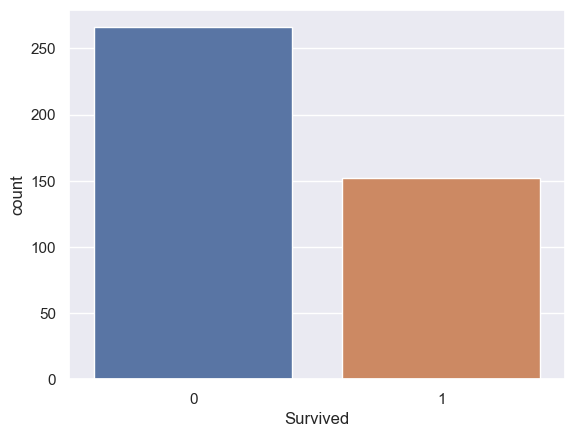

In [145]:
sns.countplot(x='Survived',data=td)

In [146]:
td['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

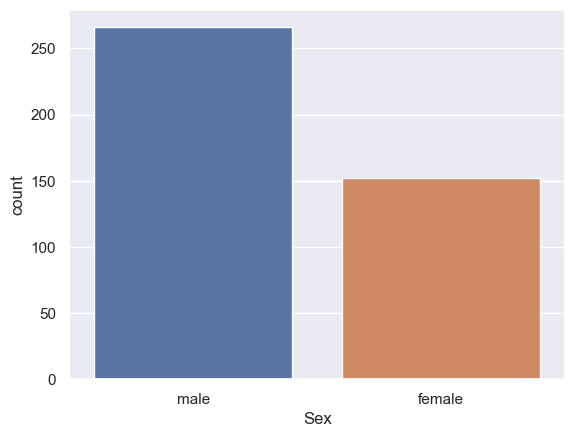

In [147]:
sns.countplot(x='Sex',data=td)

<Axes: xlabel='Sex', ylabel='count'>

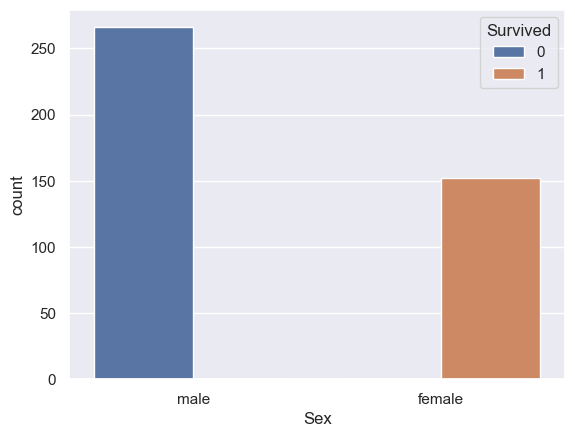

In [148]:
sns.countplot(x='Sex', hue='Survived', data=td)

<Axes: xlabel='Pclass', ylabel='count'>

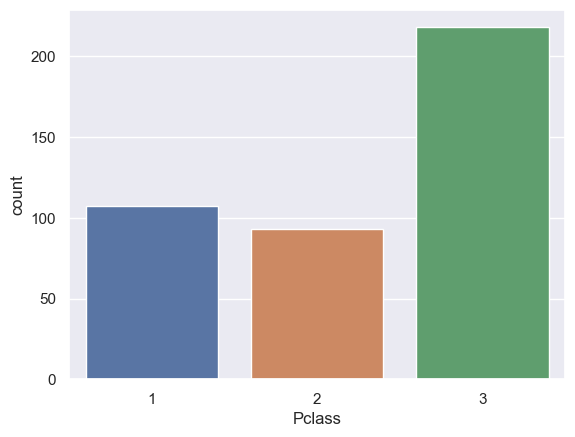

In [149]:
sns.countplot(x='Pclass', data=td)

<Axes: xlabel='Pclass', ylabel='count'>

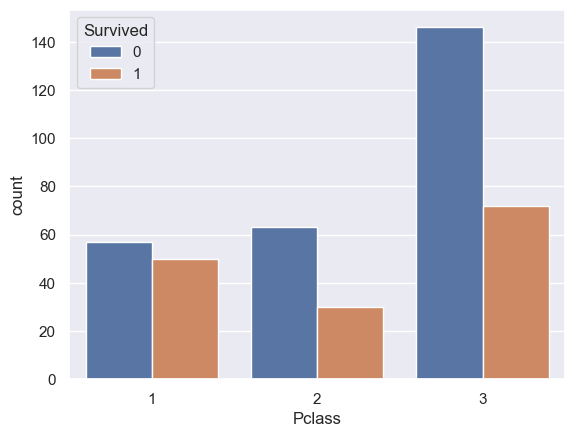

In [150]:
sns.countplot(x='Pclass', hue='Survived', data=td)

<Axes: xlabel='Age', ylabel='Count'>

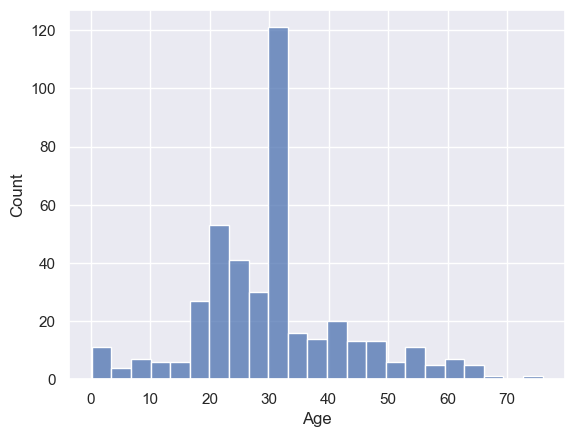

In [151]:
sns.histplot(x='Age', data=td)


c:\Users\Azeem ul Hassan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


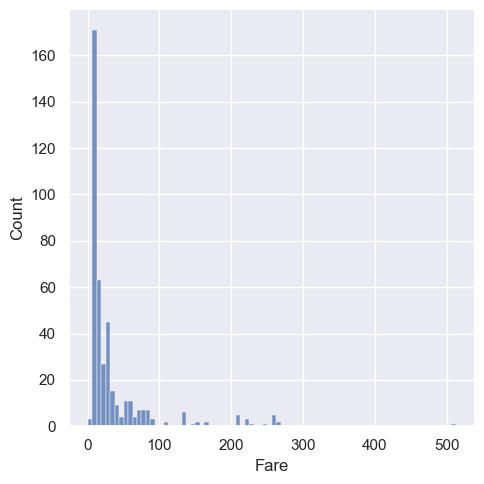

In [152]:
sns.displot(x='Fare',data=td)

<Axes: xlabel='Survived', ylabel='Fare'>

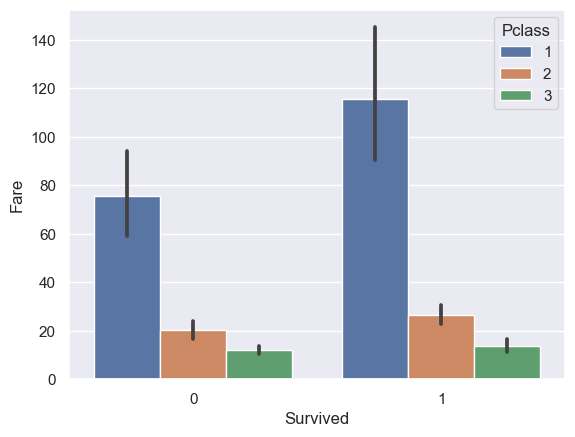

In [153]:
sns.barplot(x='Survived',y='Fare', data=td, hue='Pclass')

### Encoding Categorical Colums

In [154]:
td['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [155]:
td['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [156]:
td.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [157]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


## Feature Selecting

In [158]:
X=td.drop(columns=["PassengerId","Survived","Name","Ticket"])
Y=td['Survived']

In [159]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [160]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


### Import Libraries

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Train | Test Split

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

Logistic Regression

In [163]:
model_lr=LogisticRegression(max_iter=1000)
model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [164]:
y_pred=model_lr.predict(X_test)

In [165]:
accuracy_score(Y_test, y_pred)

1.0

Decision Tree Classifier

In [166]:
model_dtc=DecisionTreeClassifier()

In [167]:
model_lr.fit(X_train, Y_train)
y_pred=model_lr.predict(X_test)

Model

In [168]:
accuracy_score(Y_test, y_pred)

1.0

Random Forest Classiifer

In [169]:
model_rfc=RandomForestClassifier()

In [170]:
model_lr.fit(X_train,Y_train)
y_pred=model_lr.predict(X_test)

Model

In [171]:
accuracy_score(Y_test,y_pred)

1.0

Support Vector Machines

In [172]:
svm_model=SVC(kernel='linear')


In [173]:
svm_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [174]:
y_pred_svm=svm_model.predict(X_test)

Model

In [175]:
accuracy_score(Y_test,y_pred_svm)

1.0

#### Deployment

In [176]:
import pickle as pkl

In [177]:
pkl.dump(model_lr, open('model.pkl','wb'))

In [178]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [179]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [180]:
X_train.iloc[0,:]

Pclass       2.0
Sex          0.0
Age         18.5
SibSp        0.0
Parch        0.0
Fare        13.0
Embarked     0.0
Name: 109, dtype: float64

In [181]:
a=list(X_train.iloc[0,:])
a=np.array(a)

In [182]:
y_pred=model_lr.predict(a.reshape(-1,7))
y_pred

c:\Users\Azeem ul Hassan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [183]:
Y_train[0]

0

Inference

In [184]:
loadedmodel=pkl.load(open('model.pkl','rb'))

In [185]:
type(loadedmodel)

sklearn.linear_model._logistic.LogisticRegression

In [186]:
y_pred=loadedmodel.predict(a.reshape(-1,7))
y_pred

c:\Users\Azeem ul Hassan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)